## Supervised learning

<img src="figures/supervised_workflow.svg" width=100%>

# Data Representations

<img src="figures/data_representation.svg" width=100%>

# Dataset Split

<img src="figures/train_test_split_matrix.svg" width=100%>

In [1]:
from preamble import *
%matplotlib notebook

In [2]:
# read data.
# you can find a description in bank/bank-campaign-desc.txt
data = pd.read_csv("data/bank-campaign.csv")

In [3]:
data.shape

(41188, 64)

In [4]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [5]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no


In [6]:
y = data.target.values

In [7]:
X = data.drop("target", axis=1).values

In [8]:
X.shape

(41188, 63)

In [9]:
y.shape

(41188,)

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Splitting the data:

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [19]:
# import model
from sklearn.linear_model import LogisticRegression
# instantiate model, set parameters
lr = LogisticRegression()
# fit model
lr.fit(X_train, y_train)

/home/fh/env/hx/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Make predictions:

In [20]:
lr.predict(X_train)[:10]

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no'],
      dtype=object)

In [21]:
lr.score(X_train, y_train)

0.9100708944352724

In [22]:
lr.score(X_test, y_test)

0.9092939691172186

<table style="border:None">
<tr style="border:None; font-size:20px; padding:10px;"><th colspan=2>``model.fit(X_train, [y_train])``</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><th>``model.predict(X_test)``</th><th>``model.transform(X_test)``</th></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Classification</td><td>Preprocessing</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Regression</td><td>Dimensionality Reduction</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Clustering</td><td>Feature Extraction</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>&nbsp;</td><td>Feature selection</td></tr>
</table>

### Additional methods
__Model evaluation__ : ``score(X, [y])``

__Uncertainties from Classifiers__: ``decision_function(X)`` and ``predict_proba(X)``

# Method chaining
Shorter, maybe less readible.

In [15]:
# this is short, but we never stored the model
LogisticRegression().fit(X_train, y_train).score(X_test, y_test)

/home/fh/env/hx/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.909876663105759

# Exercise
Load the dataset ``data/bike_day_raw.csv``, which has the regression target ``cnt``.
This dataset is hourly bike rentals in the citybike platform. The ``cnt`` column is the number of rentals, which we want to predict from date and weather data.

Split the data into a training and a test set using ``train_test_split``.
Use the ``LinearRegression`` class to learn a regression model on this data. You can evaluate with the ``score`` method, which provides the $R^2$ or using the ``mean_squared_error`` function from ``sklearn.metrics`` (or write it yourself in numpy).

In [17]:
import pandas as pd
pd.__version__

'0.23.4'

In [27]:
df = pd.read_csv("data/bike_day_raw.csv")
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Splitting into features and targets:

In [31]:
X,y  = df.loc[:, df.columns!='cnt'], df.loc[:,df.columns=='cnt']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lR = LinearRegression()
lR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
lR.score(X_train,y_train), lR.score(X_test,y_test)

(0.5324047383449629, 0.509676025079775)

In [52]:
lR.predict(X_train)[:5]

array([[5065.491],
       [3703.069],
       [3682.649],
       [5504.616],
       [4910.129]])

In [53]:
y_train[:5]

,cnt
169,4744
75,2744
319,1817
628,7720
469,7460


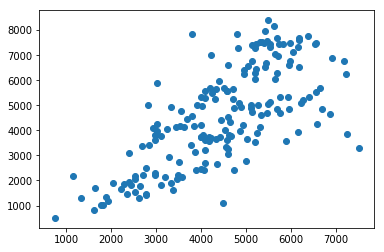

In [54]:
plt.scatter(lR.predict(X_test), y_test)